The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. We have train (8523) and test (5681) data set, train data set has both input and output variable(s). You need to predict the sales for test data set. The data contains attributes for product as well as for store where it is sold. The goal is to look at these attributes and perform univariate and multivariate analysis.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [3]:
train_orig = pd.read_csv('Data/train_BigMart.csv')
test_orig = pd.read_csv('Data/test_BigMart.csv')

In [4]:
print(train_orig.shape) # (8523, 12)
print(test_orig.shape) # (5681, 11)

(8523, 12)
(5681, 11)


In [5]:
train_orig.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [6]:
train_orig.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [7]:
train_orig.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [8]:
train_orig.isnull().sum()  # Only Item_Weight and Outlet_Size are missing

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [9]:
train_orig.Outlet_Size.mode()

0    Medium
dtype: object

# Remove Nulls

In [10]:
train = train_orig.copy()
# let's replace missing Item_Weight with mean and missing Outlet_size by mode
train.Item_Weight.fillna(train.Item_Weight.mean(), inplace = True)
train.Outlet_Size.fillna(train.Outlet_Size.mode()[0], inplace = True)

In [11]:
train.isnull().sum()  

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [12]:
len(train.Item_Identifier.unique())  # total unique products in the data 

1559

In [13]:
train.Item_Fat_Content.unique()  # Low Fat, LF, or low fat all are same.  reg and Regular are same 
train.Item_Fat_Content.value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [14]:
# Let's replace Lf and low fat with Low Fat, and reg with Regular
findL = ['LF', 'low fat', 'reg']
replaceWith = ['Low Fat', 'Low Fat','Regular' ]
train['Item_Fat_Content'] = train['Item_Fat_Content'].replace(findL, replaceWith)

In [15]:
train.Item_Fat_Content.value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [16]:
train.Item_Type.unique()       

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [17]:
train.Outlet_Identifier.unique() 

array(['OUT049', 'OUT018', 'OUT010', 'OUT013', 'OUT027', 'OUT045',
       'OUT017', 'OUT046', 'OUT035', 'OUT019'], dtype=object)

In [18]:
train.Outlet_Size.unique()  # nan values

array(['Medium', 'High', 'Small'], dtype=object)

In [19]:
train.Outlet_Location_Type.unique()

array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object)

In [20]:
train.Outlet_Type.unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

# Univariate Analysis

<AxesSubplot:xlabel='Item_Weight'>

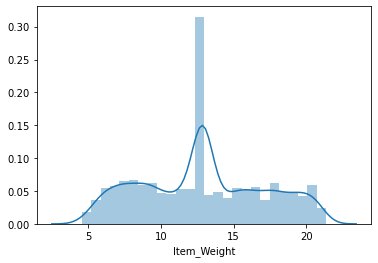

In [21]:
sns.distplot(train['Item_Weight'])   # remember this is after replacing nulls, kind of normally distributed

<AxesSubplot:xlabel='Item_Visibility'>

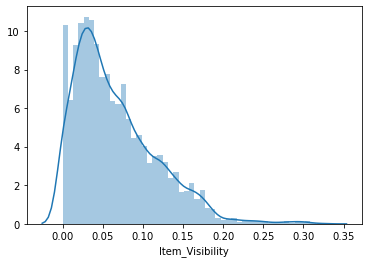

In [22]:
sns.distplot(train['Item_Visibility']) # visiblity is skewed

<AxesSubplot:xlabel='Item_MRP'>

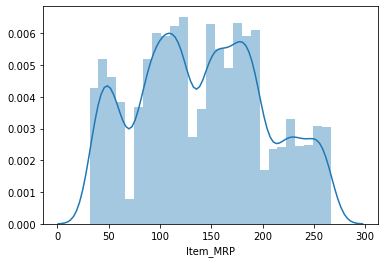

In [23]:
sns.distplot(train['Item_MRP'])  # Four groups of MRP. 

<AxesSubplot:xlabel='Outlet_Type', ylabel='count'>

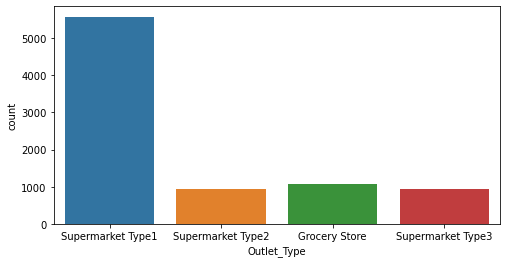

In [24]:
plt.figure(figsize=(8, 4))
sns.countplot(train['Outlet_Type'])

    # Most Outlets are Supermarkets of type 1
    # There is Significant amount of Outlets which are Grocery store.



<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

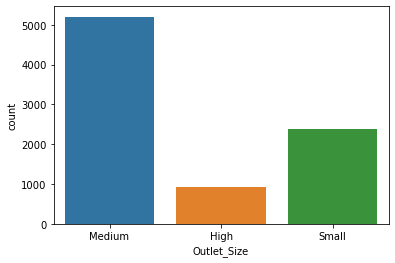

In [25]:
sns.countplot(train['Outlet_Size']) # maximum outlets are medium sized

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='count'>

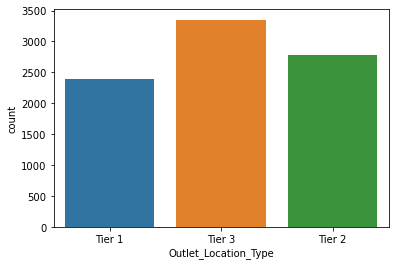

In [26]:
sns.countplot(train['Outlet_Location_Type'])  # Most of the Outlet are located in Tier 3 
                                              # Tier 2 location is second most after Tier 3.

# Bi-variate Analyis

In [27]:
train.corr(method ='pearson') 

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.012049,0.024756,-0.008301,0.011550
Item_Visibility,-0.012049,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.024756,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.008301,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.011550,-0.128625,0.567574,-0.049135,1.000000


<AxesSubplot:>

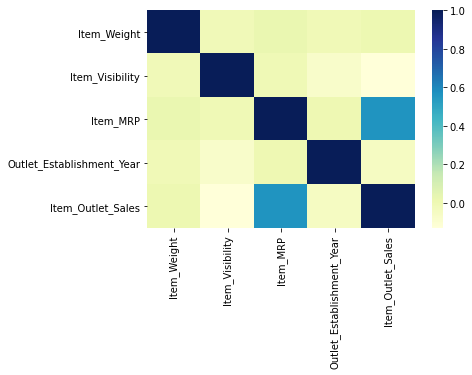

In [28]:
sns.heatmap(train.corr(), cmap="YlGnBu")  #  price of item is correlated to sales

<AxesSubplot:xlabel='Item_MRP', ylabel='Item_Outlet_Sales'>

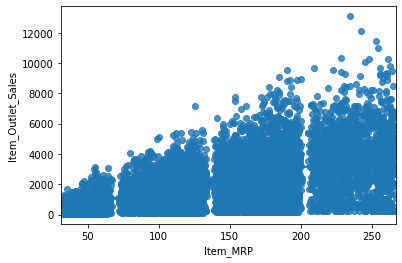

In [33]:
sns.regplot(x='Item_MRP',y='Item_Outlet_Sales',data=train) 
# The relation is almost linear and the higher the price, the better the sales. 

<AxesSubplot:xlabel='Item_Weight', ylabel='Item_Outlet_Sales'>

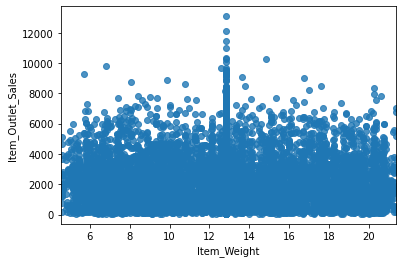

In [29]:
sns.regplot(x='Item_Weight',y='Item_Outlet_Sales',data=train)  # not a strong correlation with sales

<AxesSubplot:xlabel='Item_Visibility', ylabel='Item_Outlet_Sales'>

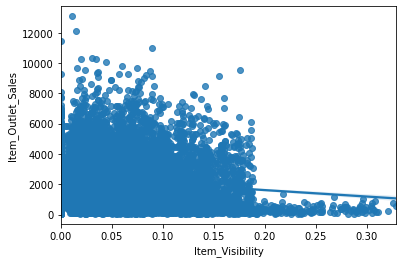

In [30]:
sns.regplot(x='Item_Visibility',y='Item_Outlet_Sales',data=train)  # negative correlation

<AxesSubplot:xlabel='Outlet_Identifier', ylabel='Item_Outlet_Sales'>

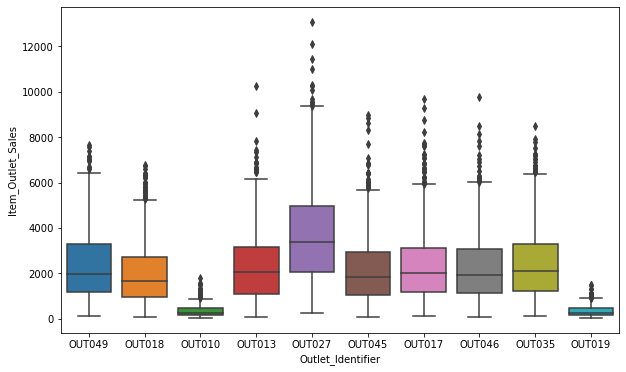

In [31]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Outlet_Identifier',y='Item_Outlet_Sales',data=train)  # OUT027 has max sales

<AxesSubplot:xlabel='Outlet_Size', ylabel='Item_Outlet_Sales'>

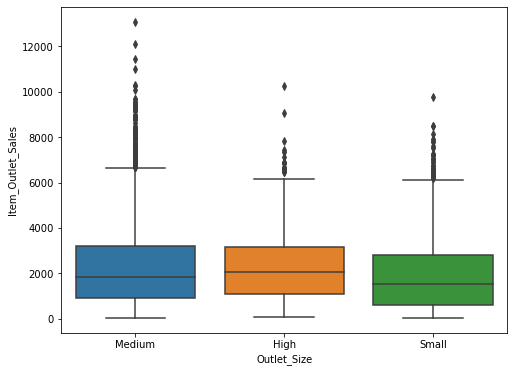

In [32]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Outlet_Size',y='Item_Outlet_Sales',data=train)